# deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [2]:
df = pd.read_csv('food.csv')

# ESTIMASI KANDUNGAN GIZI DALAM AIR
# =============================


## 1. BUSINESS UNDERSTANDING

A. Pengertian

Business Understanding merupakan awal dari sebuah projek data analytics, tahapan ini akan dapat menghasilkan 
perencanaan sebuah proyek data analytics yang jelas tujuannya dengan pemahaman proses bisnis yang komprehensif.


B. Problem 

Kumpulan data ini adalah database lengkap nilai gizi untuk ribuan makanan yang berbeda. Ini mencakup informasi tentang kalori, vitamin, mineral, dan banyak lagi. Kumpulan data ini sangat cocok untuk siapa saja yang tertarik dengan kandungan nutrisi makanan mereka. Dengan kumpulan data ini, kita dapat mempelajari berbagai nutrisi dalam makanan kita sehari hari dan bagaimana nutrisi tersebut berkontribusi pada kesehatan kita secara keseluruhan.


C. Tujuan

Dataset ini saya ambil dari
 (https://www.kaggle.com/datasets/thedevastator/the-nutritional-content-of-food-a-comprehensive)
tujuannya ialah untuk mengalisis kandungan" gizi dalam sebuah air(g) , agar dapat dijadikan acuan dalam meminum air sehari-hari dan mengetahui berapa saja kandunga gizi yaitu Carbohydrt , Calcium , Cholestrl , Sodium dan Zinc dalam air melalui inputan Carbohydrt , Calcium , Cholestrl , Sodium dan Zinc


## 2. DATA UNDERSTANDING

A. Pengertian 

Data understandinng ialah sebuah tahapan dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapaykan
pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan bisnis yang diberikan. 

Dari data yang telah di ambil mengenai kandungan gizi pada setiap makanan.
Berikut adalah variabelnya : 

0   index       111 non-null    int64  
 1   NDB_No      111 non-null    int64  
 2   Shrt_Desc   111 non-null    object 
 3   Water_(g)   111 non-null    float64
 4   Energ_Kcal  111 non-null    int64  
 5   Carbohydrt  111 non-null    float64
 6   Calcium     111 non-null    int64  
 7   Cholestrl   111 non-null    int64  
 8   Sodium      111 non-null    int64  
 9   Zinc        111 non-null    float64




# Deskripsi Dataset

In [4]:
df.head()

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Carbohydrt,Calcium,Cholestrl,Sodium,Zinc
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.06,24,215,643,0.09
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,2.87,23,225,583,0.05
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.00,4,256,2,0.01
3,3,1004,"CHEESE,BLUE",42.41,353,2.34,528,75,1146,2.66
4,4,1005,"CHEESE,BRICK",41.11,371,2.79,674,94,560,2.60


# DATA PREPARATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       111 non-null    int64  
 1   NDB_No      111 non-null    int64  
 2   Shrt_Desc   111 non-null    object 
 3   Water_(g)   111 non-null    float64
 4   Energ_Kcal  111 non-null    int64  
 5   Carbohydrt  111 non-null    float64
 6   Calcium     111 non-null    int64  
 7   Cholestrl   111 non-null    int64  
 8   Sodium      111 non-null    int64  
 9   Zinc        111 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 8.8+ KB


<Axes: >

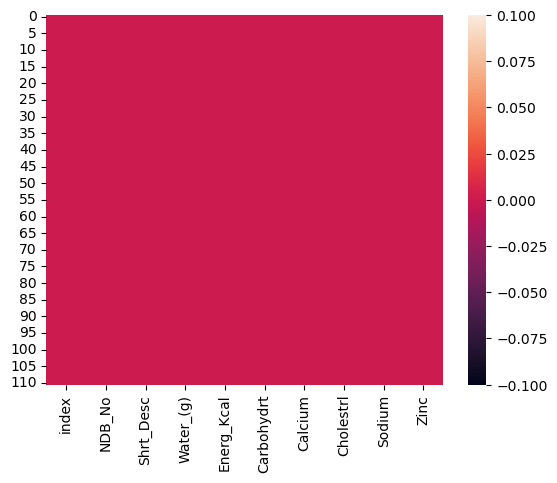

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,index,NDB_No,Water_(g),Energ_Kcal,Carbohydrt,Calcium,Cholestrl,Sodium,Zinc
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,55.000000,1059.990991,58.461982,235.855856,10.843694,364.981982,48.351351,434.792793,1.533874
std,32.186954,36.299636,27.326063,168.792064,15.669393,373.201505,50.954819,500.018984,1.455697
min,0.000000,1001.000000,0.240000,24.000000,0.000000,2.000000,0.000000,2.000000,0.010000
25%,27.500000,1028.500000,40.980000,77.500000,2.915000,108.000000,5.000000,57.500000,0.390000
50%,55.000000,1057.000000,63.500000,253.000000,4.960000,152.000000,27.000000,124.000000,0.770000
75%,82.500000,1090.500000,82.375000,355.000000,10.435000,667.500000,89.000000,678.000000,2.775000
max,110.000000,1122.000000,93.420000,876.000000,74.460000,2054.000000,256.000000,2280.000000,6.310000


# Visualisasi Data

C:\Users\mjati\AppData\Local\Temp\ipykernel_8908\2303800637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

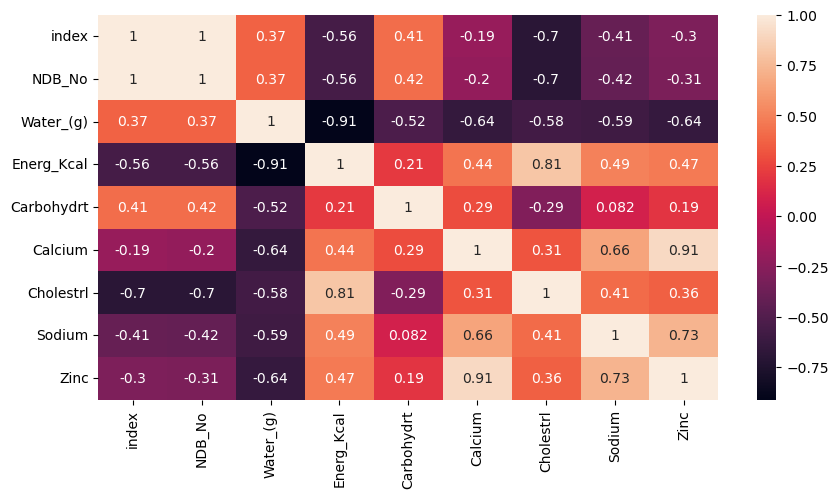

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# jumlah kandungan kalori dalam makanan

In [23]:
models = df.groupby('Shrt_Desc').count()[['Energ_Kcal']].sort_values(by='Energ_Kcal',ascending=True).reset_index()
models = models.rename(columns={'Energ_Kcal':'foodOfEnergy'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 [Text(0, 0, 'BUTTER OIL,ANHYDROUS'),
  Text(1, 0, 'MILK,FILLED,FLUID,W/BLEND OF HYDR VEG OILS'),
  Text(2, 0, 'MILK,DRY,WHL,W/ ADDED VITAMIN D'),
  Text(3, 0, 'MILK,DRY,NONFAT,REG,WO/ ADDED VIT A & VITAMIN D'),
  Text(4, 0, 'MILK,DRY,NONFAT,INST,W/ ADDED VIT A & VITAMIN D'),
  Text(5, 0, 'MILK,DRY,NONFAT,CA RED'),
  Text(6, 0, 'MILK,CND,EVAP,W/ ADDED VITAMIN D & WO/ A

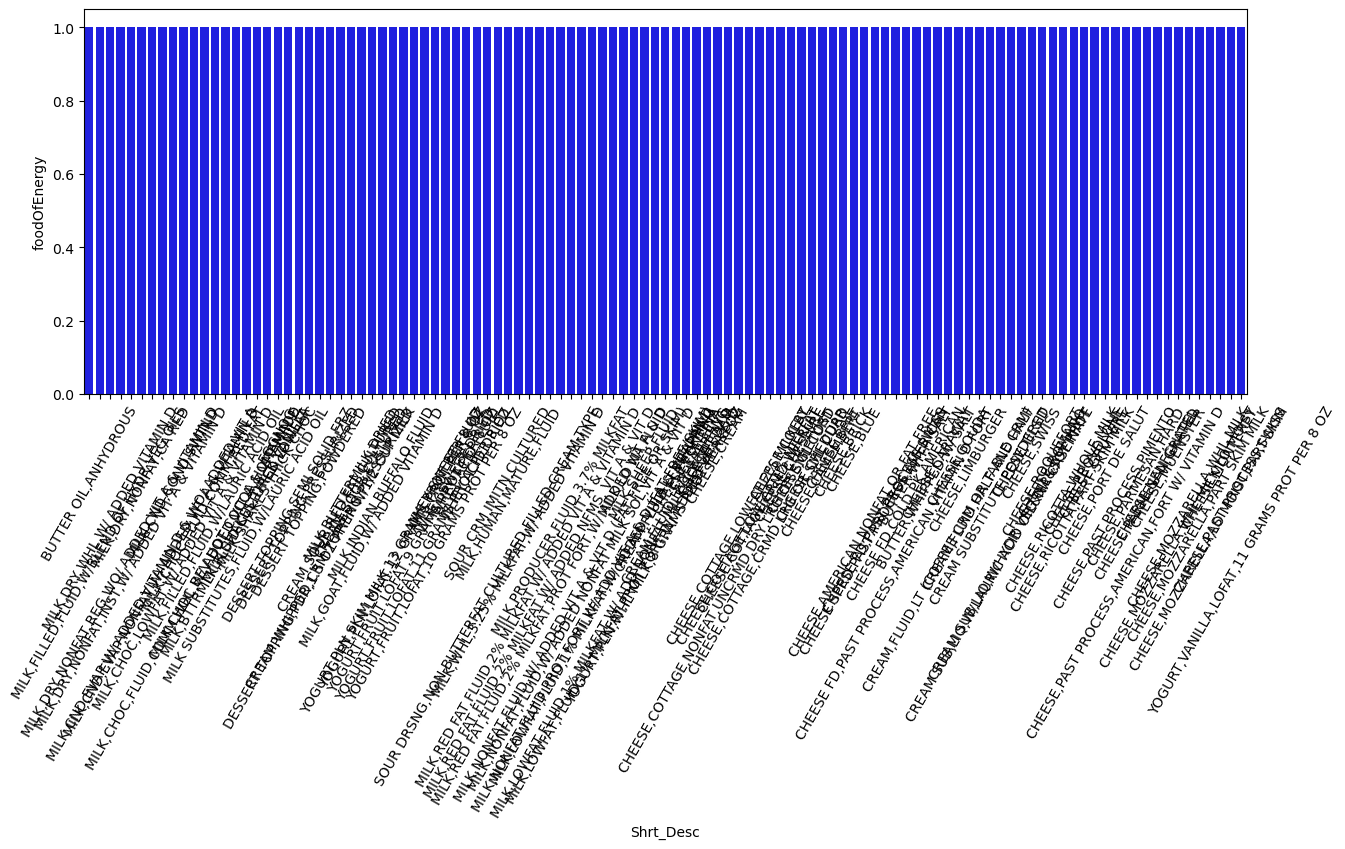

In [24]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Shrt_Desc'], y=models['foodOfEnergy'], color='blue')
plt.xticks(rotation=60)

# MODELLING DATA

# seleksi fitur

In [30]:
features = ['Carbohydrt','Calcium','Cholestrl','Sodium','Zinc']
x = df[features]
y = df['Water_(g)']
x.shape, y.shape

((111, 5), (111,))

# split data training dan data testing

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(28,)

# membuat model regresi linier

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

# EVALUATION DATA

In [14]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.882097360210351


# membuat inputan model regresi linier

In [32]:
input_data = np.array([[4.78,643,103,700,2.79]])

prediction = lr.predict(input_data)
print('Estimasi kandungan gizi dalam air :', prediction)

Estimasi kandungan gizi dalam air : [40.91449051]


c:\Users\mjati\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# save model

In [34]:
import pickle

filename = 'estimasi_gizi.sav'
pickle.dump(lr,open(filename,'wb'))